# Days of the Week

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,2
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,3
3,1/1/2014,03:20,Wednesday,BLOOR,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,3
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,3


In [8]:
bloor_color = '#2b720a'
scarborough_color = '#0a6797'
sheppard_color = '#8b1962'
yonge_color = '#FFD700'
colors=[bloor_color, scarborough_color, sheppard_color, yonge_color]

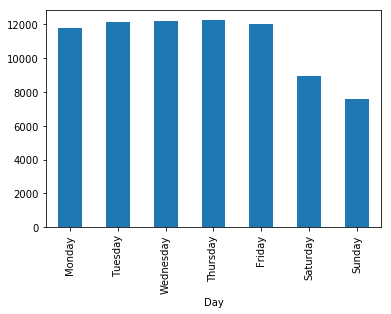

In [9]:
# Convert Day to Categorical so it's sorted Monday --> Sunday instead of alphabetically
ttc['Day'] = pd.Categorical(ttc['Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
days = ttc.groupby('Day').size()
days.plot.bar()
plt.show()

Non Normalized Breakdown by Line

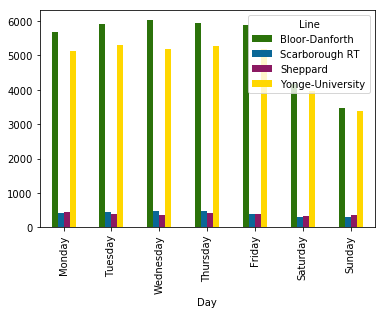

In [12]:
days_per_line = ttc.pivot_table(index='Day', columns='Line', aggfunc=len, values='Time')
days_per_line.plot.bar(color=colors)
plt.show()

Normalized breakdown per line

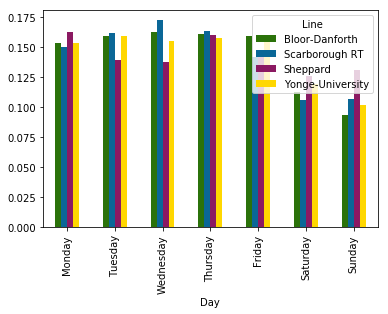

In [11]:
days_ct = pd.crosstab(ttc.Day, ttc.Line, normalize='columns')
days_ct.plot.bar(color=colors)
plt.show()